# Numpy

In the `numpy` package the terminology used for vectors, matrices and higher-dimensional data sets is *array*.

This is adapted from Thomas Hauser's (thomas.hauser@colorado.edu) notebook.

## Outline

- Array creation
- Array-generating functions
    - `random`
    - `arange`, `linspace`, `logspace`
    - `zeros`, `ones`
- File IO
- Indexing and slicing
- Filtering
- Operations
- Broadcasting

## Further reading
 
* http://numpy.scipy.org
* http://scipy.org/Tentative_NumPy_Tutorial
* http://scipy.org/NumPy_for_Matlab_Users - A Numpy guide for MATLAB users.


In [1]:
import numpy as np
%pylab inline

Populating the interactive namespace from numpy and matplotlib


## `array`

Arrays can be created from

* lists or tuples
* using functions 
* reading data from files

In [2]:
vector = np.array([1.0, 3.3, 4.1, 5.3, 6.1])
print vector

[ 1.   3.3  4.1  5.3  6.1]


In [3]:
matrix = np.array([ [1, 1, 1],[8, 4, 5] ])
print matrix

[[1 1 1]
 [8 4 5]]


Arrays are of type `ndarray` that the `numpy` module provides.

In [4]:
print type(vector)
print type(matrix)

<type 'numpy.ndarray'>
<type 'numpy.ndarray'>


Arrays have shapes. This is a property of an array

In [5]:
print np.shape(vector)
print np.shape(matrix)

(5,)
(2, 3)


In [6]:
help(np.shape)

Help on function shape in module numpy.core.fromnumeric:

shape(a)
    Return the shape of an array.
    
    Parameters
    ----------
    a : array_like
        Input array.
    
    Returns
    -------
    shape : tuple of ints
        The elements of the shape tuple give the lengths of the
        corresponding array dimensions.
    
    See Also
    --------
    alen
    ndarray.shape : Equivalent array method.
    
    Examples
    --------
    >>> np.shape(np.eye(3))
    (3, 3)
    >>> np.shape([[1, 2]])
    (1, 2)
    >>> np.shape([0])
    (1,)
    >>> np.shape(0)
    ()
    
    >>> a = np.array([(1, 2), (3, 4)], dtype=[('x', 'i4'), ('y', 'i4')])
    >>> np.shape(a)
    (2,)
    >>> a.shape
    (2,)



The number of elements in the array is available through the `ndarray.size` property

In [7]:
print np.size(vector)
print np.size(matrix)

5
6


In [8]:
print np.ndim(vector)
print np.ndim(matrix)

1
2


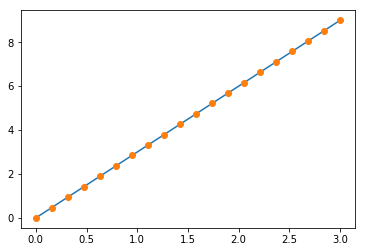

In [9]:
x = np.linspace(0, 3, 20)
y = np.linspace(0, 9, 20)
plt.plot(x, y)
plt.plot(x, y, 'o') 

In [10]:
print vector
print matrix

[ 1.   3.3  4.1  5.3  6.1]
[[1 1 1]
 [8 4 5]]


## Why user arrays?

* List are general, can hold different data types
* Numpy arrays are **statically typed** and **homogeneous**. 
* Numpy arrays are memory efficient.
* Fast implementation of mathematical functions such as multiplication and addition of `numpy` arrays because of static type

In [11]:
print vector.dtype
print matrix.dtype

float64
int64


In [12]:
print vector[1]
print matrix[0,2]

3.3
1


In [13]:
matrix[0,] = 3.1
print matrix

[[3 3 3]
 [8 4 5]]


In [14]:
vector[1] = "string"

ValueError: could not convert string to float: string

In [15]:
vector[1] = 3
print vector

[ 1.   3.   4.1  5.3  6.1]


In [16]:
matrix = np.array([[1, 2], [3, 4]], dtype=float64)
print matrix

[[ 1.  2.]
 [ 3.  4.]]


## Using array-generating functions
 
For larger arrays it is inpractical to initialize the data manually, using explicit pythons lists. Instead we can use one of the many functions in `numpy` that generates arrays of different forms. Some of the more common are:

### `arange`

In [18]:
x = np.arange(1, 10, 0.25)
print x
type(x)

[ 1.    1.25  1.5   1.75  2.    2.25  2.5   2.75  3.    3.25  3.5   3.75
  4.    4.25  4.5   4.75  5.    5.25  5.5   5.75  6.    6.25  6.5   6.75
  7.    7.25  7.5   7.75  8.    8.25  8.5   8.75  9.    9.25  9.5   9.75]


numpy.ndarray

In [19]:
help(np.arange)

Help on built-in function arange in module numpy.core.multiarray:

arange(...)
    arange([start,] stop[, step,], dtype=None)
    
    Return evenly spaced values within a given interval.
    
    Values are generated within the half-open interval ``[start, stop)``
    (in other words, the interval including `start` but excluding `stop`).
    For integer arguments the function is equivalent to the Python built-in
    `range <http://docs.python.org/lib/built-in-funcs.html>`_ function,
    but returns an ndarray rather than a list.
    
    When using a non-integer step, such as 0.1, the results will often not
    be consistent.  It is better to use ``linspace`` for these cases.
    
    Parameters
    ----------
    start : number, optional
        Start of interval.  The interval includes this value.  The default
        start value is 0.
    stop : number
        End of interval.  The interval does not include this value, except
        in some cases where `step` is not an integer and

### `linspace`

In [20]:
print np.linspace(0, 10, 15)

[  0.           0.71428571   1.42857143   2.14285714   2.85714286
   3.57142857   4.28571429   5.           5.71428571   6.42857143
   7.14285714   7.85714286   8.57142857   9.28571429  10.        ]


In [ ]:
help(np.linspace)

### `logspace`

In [21]:
print np.logspace(0, 5, 10, base=e)

[   1.            1.742909      3.03773178    5.29449005    9.22781435
   16.08324067   28.03162489   48.85657127   85.15255772  148.4131591 ]


### `random`

In [22]:
from numpy import random

Uniform random numbers ini [0,1]

In [24]:
print random.rand(10)

[ 0.41380378  0.34225385  0.71826774  0.7122964   0.23593366  0.94906482
  0.27122796  0.896727    0.49649062  0.4282778 ]


(array([  97.,  101.,   93.,  107.,   95.,  106.,  100.,  102.,   88.,  111.]),
 array([  2.96695053e-04,   1.00243904e-01,   2.00191114e-01,
          3.00138323e-01,   4.00085533e-01,   5.00032742e-01,
          5.99979951e-01,   6.99927161e-01,   7.99874370e-01,
          8.99821580e-01,   9.99768789e-01]),
 <a list of 10 Patch objects>)

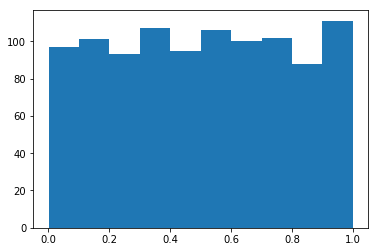

In [25]:
plt.hist(random.rand(1000))

In [26]:
print random.rand(5,5)

[[ 0.47883274  0.94484707  0.88668805  0.4472076   0.86269243]
 [ 0.1804453   0.3683464   0.15902621  0.27954444  0.24259238]
 [ 0.18686966  0.04304646  0.74052593  0.54943053  0.82292478]
 [ 0.33918567  0.52680535  0.76364378  0.59699427  0.96244351]
 [ 0.60765816  0.02441221  0.01326271  0.32917621  0.46638458]]


Standard normal distributed random numbers

In [27]:
print random.randn(5,5)

[[ 0.3223821   1.19335684  1.11163533 -0.19487033 -3.18001159]
 [ 0.50595289  1.20051775  0.54121462  0.69154468  0.08327548]
 [ 0.27185966 -0.23269982 -1.00208191 -0.81192489  0.80682432]
 [-0.04106358 -0.29392392 -1.50635974  1.13179184  0.34232123]
 [ 0.97732619  0.22017375  1.02986881  0.68888252 -0.36331847]]


(array([   3.,   10.,   49.,  147.,  191.,  261.,  196.,   98.,   33.,   12.]),
 array([-3.45227707, -2.79695191, -2.14162676, -1.4863016 , -0.83097644,
        -0.17565128,  0.47967388,  1.13499904,  1.7903242 ,  2.44564936,
         3.10097452]),
 <a list of 10 Patch objects>)

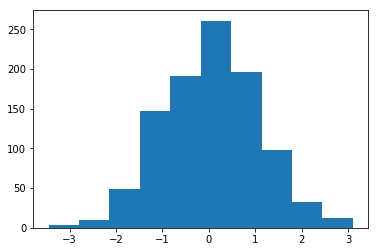

In [30]:
plt.hist(random.randn(1000))

There are several useful `np.random` functions.

    seed, permutation, shuffle, randn, rand

### common arrays: `zeros`, `ones`

In [31]:
print np.zeros(10)

[ 0.  0.  0.  0.  0.  0.  0.  0.  0.  0.]


In [32]:
type(np.zeros(10))

numpy.ndarray

In [33]:
print np.zeros((3,3))

[[ 0.  0.  0.]
 [ 0.  0.  0.]
 [ 0.  0.  0.]]


In [34]:
print np.ones((3,3))

[[ 1.  1.  1.]
 [ 1.  1.  1.]
 [ 1.  1.  1.]]


In [35]:
c = np.eye(3)
c

array([[ 1.,  0.,  0.],
       [ 0.,  1.,  0.],
       [ 0.,  0.,  1.]])

In [36]:
help(np.eye)

Help on function eye in module numpy.lib.twodim_base:

eye(N, M=None, k=0, dtype=<type 'float'>)
    Return a 2-D array with ones on the diagonal and zeros elsewhere.
    
    Parameters
    ----------
    N : int
      Number of rows in the output.
    M : int, optional
      Number of columns in the output. If None, defaults to `N`.
    k : int, optional
      Index of the diagonal: 0 (the default) refers to the main diagonal,
      a positive value refers to an upper diagonal, and a negative value
      to a lower diagonal.
    dtype : data-type, optional
      Data-type of the returned array.
    
    Returns
    -------
    I : ndarray of shape (N,M)
      An array where all elements are equal to zero, except for the `k`-th
      diagonal, whose values are equal to one.
    
    See Also
    --------
    identity : (almost) equivalent function
    diag : diagonal 2-D array from a 1-D array specified by the user.
    
    Examples
    --------
    >>> np.eye(2, dtype=int)
    array

In [37]:
d = np.diag(np.array([1, 2, 3, 4]))
d

array([[1, 0, 0, 0],
       [0, 2, 0, 0],
       [0, 0, 3, 0],
       [0, 0, 0, 4]])

## Reading and writing data with `numpy`

os — Miscellaneous operating system interfaces

In [38]:
import os
filename = os.path.join('data','iris.csv')
filename

'data/iris.csv'

In [ ]:
help(os.path.join)

In [39]:
!head data/iris.csv

sepal_length,sepal_width,pedal_length,pedal_width,class
5.1,3.5,1.4,0.2,Iris-setosa
4.9,3.0,1.4,0.2,Iris-setosa
4.7,3.2,1.3,0.2,Iris-setosa
4.6,3.1,1.5,0.2,Iris-setosa
5.0,3.6,1.4,0.2,Iris-setosa
5.4,3.9,1.7,0.4,Iris-setosa
4.6,3.4,1.4,0.3,Iris-setosa
5.0,3.4,1.5,0.2,Iris-setosa
4.4,2.9,1.4,0.2,Iris-setosa


### Reading

In [40]:
iris = np.loadtxt(filename, delimiter=',', usecols=(0,1,2,3), skiprows=1)
print iris[0:5:,] #Talk about slicing soon

[[ 5.1  3.5  1.4  0.2]
 [ 4.9  3.   1.4  0.2]
 [ 4.7  3.2  1.3  0.2]
 [ 4.6  3.1  1.5  0.2]
 [ 5.   3.6  1.4  0.2]]


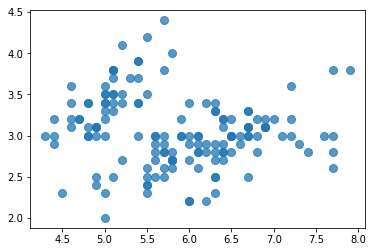

In [41]:
sl, sw = np.loadtxt(filename, delimiter=',', usecols=(0,1), skiprows=1, unpack=True)
plt.plot(sl,sw, 'o', markersize=8, alpha=0.75)

Missing data? Use `np.genfromtxt`.

In [42]:
iris = np.genfromtxt(filename, delimiter=',', usecols=(0,1,2,3), skip_header=1 )
print iris[0:5:,]

[[ 5.1  3.5  1.4  0.2]
 [ 4.9  3.   1.4  0.2]
 [ 4.7  3.2  1.3  0.2]
 [ 4.6  3.1  1.5  0.2]
 [ 5.   3.6  1.4  0.2]]


Don't forget to ask for help: `help(np.loadtxt)` and `help(np.genfromtxt)`.

In [ ]:
help(np.genfromtxt)

### Writing

In [43]:
filename = os.path.join('data','yeni.txt')
np.savetxt(filename, iris)
!head $filename

5.099999999999999645e+00 3.500000000000000000e+00 1.399999999999999911e+00 2.000000000000000111e-01
4.900000000000000355e+00 3.000000000000000000e+00 1.399999999999999911e+00 2.000000000000000111e-01
4.700000000000000178e+00 3.200000000000000178e+00 1.300000000000000044e+00 2.000000000000000111e-01
4.599999999999999645e+00 3.100000000000000089e+00 1.500000000000000000e+00 2.000000000000000111e-01
5.000000000000000000e+00 3.600000000000000089e+00 1.399999999999999911e+00 2.000000000000000111e-01
5.400000000000000355e+00 3.899999999999999911e+00 1.699999999999999956e+00 4.000000000000000222e-01
4.599999999999999645e+00 3.399999999999999911e+00 1.399999999999999911e+00 2.999999999999999889e-01
5.000000000000000000e+00 3.399999999999999911e+00 1.500000000000000000e+00 2.000000000000000111e-01
4.400000000000000355e+00 2.899999999999999911e+00 1.399999999999999911e+00 2.000000000000000111e-01
4.900000000000000355e+00 3.100000000000000089e+00 1.500000000000000000e+00 1.000000000000000056e-01


In [44]:
np.savetxt(filename, iris, fmt='%.2f', delimiter='\t')
!head $filename

5.10	3.50	1.40	0.20
4.90	3.00	1.40	0.20
4.70	3.20	1.30	0.20
4.60	3.10	1.50	0.20
5.00	3.60	1.40	0.20
5.40	3.90	1.70	0.40
4.60	3.40	1.40	0.30
5.00	3.40	1.50	0.20
4.40	2.90	1.40	0.20
4.90	3.10	1.50	0.10


In [ ]:
help(np.savetxt)

## Indexing and slicing

Index slicing is the technical name for the syntax 

    container[lower:upper:step]
    
to extract part of an array.

We can omit any of the three parameters in `container[lower:upper:step]`.

In [45]:
x = np.arange(1, 20, 1)
print x

[ 1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19]


In [46]:
print x[0:10]

[ 1  2  3  4  5  6  7  8  9 10]


In [47]:
print x[:10]

[ 1  2  3  4  5  6  7  8  9 10]


In [48]:
print x[::2]

[ 1  3  5  7  9 11 13 15 17 19]


In [49]:
print x[1::2]

[ 2  4  6  8 10 12 14 16 18]


Last element

In [50]:
print x[-1:]

[19]


Last 10 elements

In [51]:
print x[-10:]

[10 11 12 13 14 15 16 17 18 19]


### Fancy Indexing

NumPy arrays may be used to index into other arrays

In [55]:
a = np.arange(15).reshape((3,5))

In [53]:
a

array([[ 0,  1,  2,  3,  4],
       [ 5,  6,  7,  8,  9],
       [10, 11, 12, 13, 14]])

In [56]:
i = np.array([[0,1], [1, 2]])

In [63]:
i

array([[0, 1],
       [1, 2]])

In [58]:
j = np.array([[2, 1], [4, 4]])
j

array([[2, 1],
       [4, 4]])

In [61]:
a[i,]

array([[[ 0,  1,  2,  3,  4],
        [ 5,  6,  7,  8,  9]],

       [[ 5,  6,  7,  8,  9],
        [10, 11, 12, 13, 14]]])

In [64]:
a[i,j]

array([[ 2,  6],
       [ 9, 14]])

Boolean arrays can also be used as indices into other arrays

In [65]:
b = (a % 3 == 0)

In [66]:
b

array([[ True, False, False,  True, False],
       [False,  True, False, False,  True],
       [False, False,  True, False, False]], dtype=bool)

In [67]:
a[b]

array([ 0,  3,  6,  9, 12])

## Operations

### Scalar

Several built-in functions *unary* functions (takes one argument):

        abs, fabs, sqrt, exp, square, log, ceil, floor

In [68]:
x = np.arange(-5,5)
print x
print np.square(x)

[-5 -4 -3 -2 -1  0  1  2  3  4]
[25 16  9  4  1  0  1  4  9 16]


*Binary* functions:
    
        add, subtract, multiply, divide, power, maximum, minimum, greater, less

In [69]:
x = np.arange(-5,5)
y = np.square(x)
print x
print y
print np.minimum(x,y)
print np.add(x,y)

[-5 -4 -3 -2 -1  0  1  2  3  4]
[25 16  9  4  1  0  1  4  9 16]
[-5 -4 -3 -2 -1  0  1  2  3  4]
[20 12  6  2  0  0  2  6 12 20]


### Statistic

Methods:

        sum, mean, std, var, min, max, argmin, argmax, cumsum, cumprod

In [70]:
print y
print np.cumsum(y)
print np.min(y)

[25 16  9  4  1  0  1  4  9 16]
[25 41 50 54 55 55 56 60 69 85]
0


### Linear Algebra

Methods:
    
        dot, inv, diag, trace, eig, det, qr, svd, solve

In [ ]:
a = np.arange(0,25).reshape((5,5))
print a

In [ ]:
b = a*a
print b

In [ ]:
b = np.dot(a,a.T)
print b

## Broadcasting

Arithmetic between `array`s of different shapes.

In [71]:
vec = np.arange(1,10)
print vec * 5

[ 5 10 15 20 25 30 35 40 45]


The value `5` was broadcasted to the elements of vec.  Here's a more extensive example: